# Tech_Stocks_Price_EDA

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

### Data preparation

In [53]:
path='F:\EDA_projects\Stock_Data\individual_stocks_5yr\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOGL_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(5036, 7)

In [54]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [55]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [56]:
all_data['date']=pd.to_datetime(all_data['date'])

In [57]:
all_data['date'][0]

0   2013-02-08
0   2013-02-08
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [58]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

### Closing price of all the stocks

In [59]:
tech_list = all_data['Name'].unique()

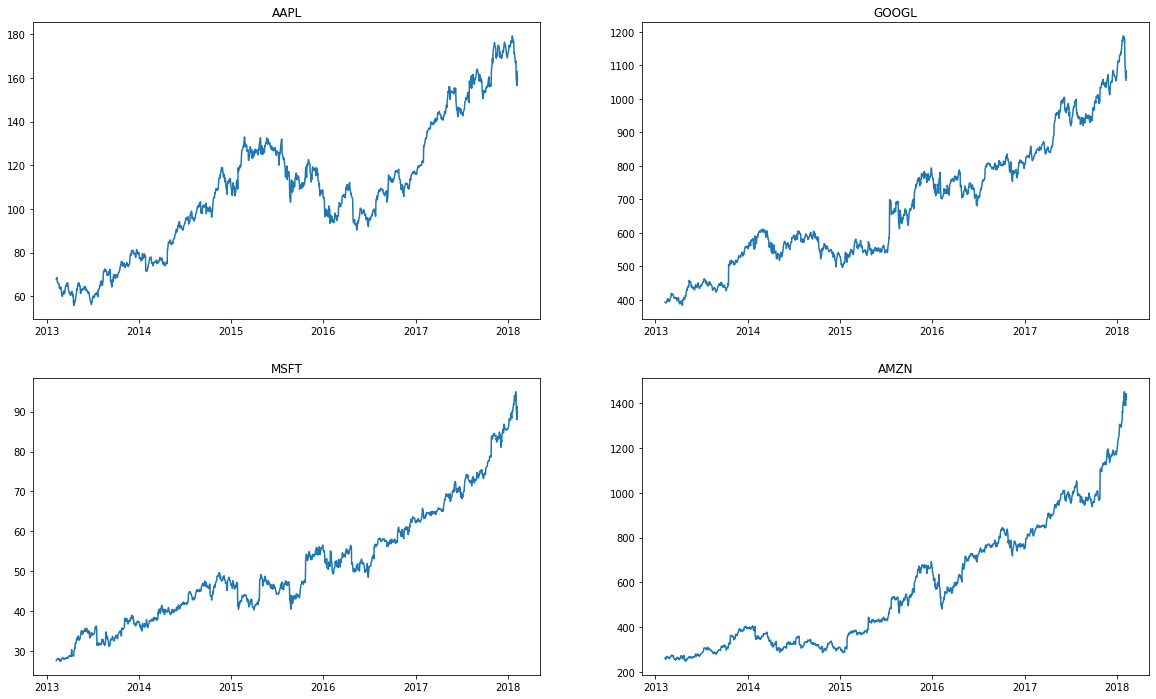

In [60]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

    

### Total volume of stock being traded each day

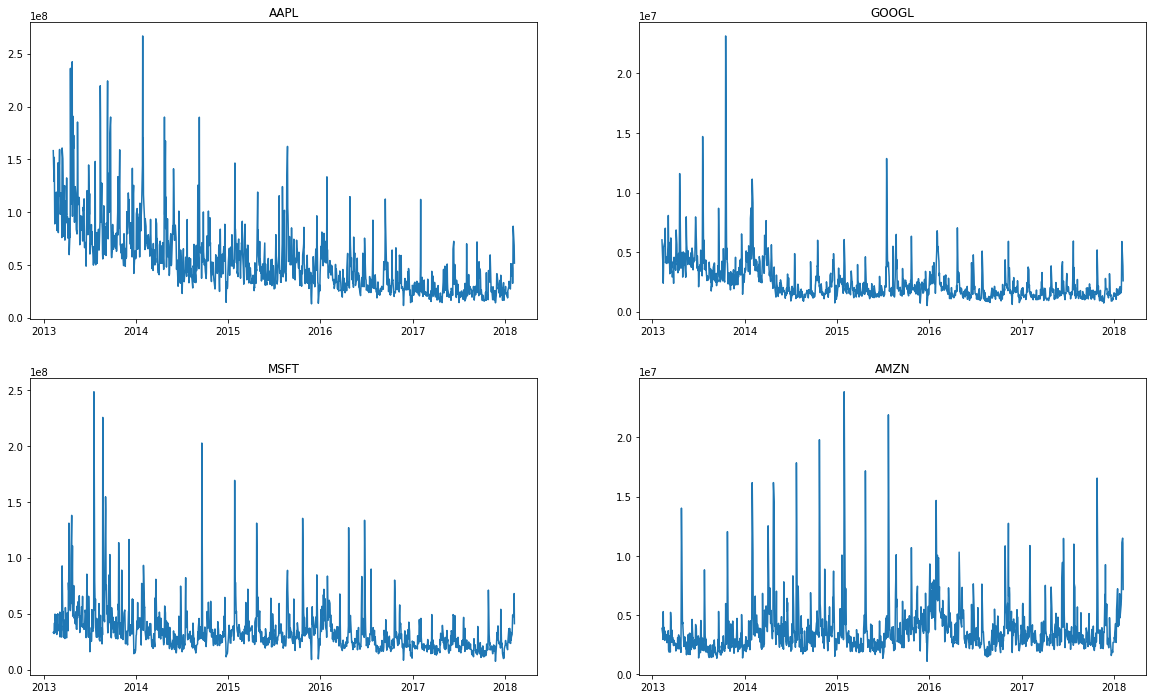

In [61]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


#### By plotly

In [62]:
# !pip install plotly
# import plotly.express as px

In [63]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

In [64]:
all_data['Name'].unique()

array(['AAPL', 'GOOGL', 'MSFT', 'AMZN'], dtype=object)

### Daily fluctuation in stock price.

In [65]:
df=pd.read_csv('AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


##### percentage return

In [66]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


In [67]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day % return'],
      dtype='object')

##### By plotly

In [68]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='')
fig.show()

##### By Matplotlib 

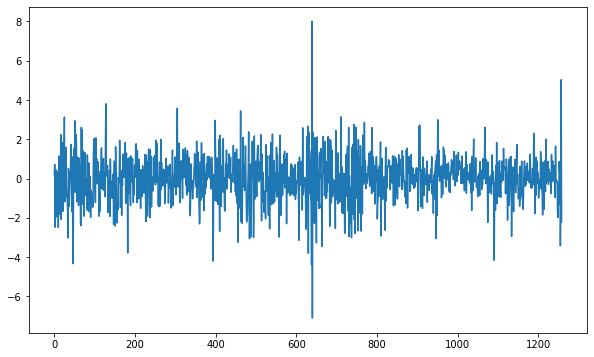

In [69]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

### Return between a particular interval

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 <a list of 9 Text xticklabel objects>)

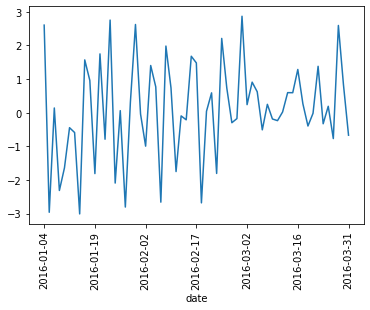

In [70]:
df.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
plt.xticks(rotation='vertical')

### Monthly mean of closing price

In [71]:
df2=df.copy()

In [72]:
df2['date']=pd.to_datetime(df2['date'])

In [73]:
df2.set_index('date',inplace=True)

In [74]:
df2.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


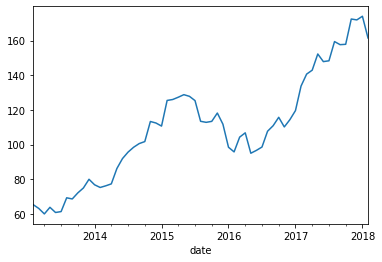

In [75]:
df2['close'].resample('M').mean().plot()

#### Resampling close column year wise

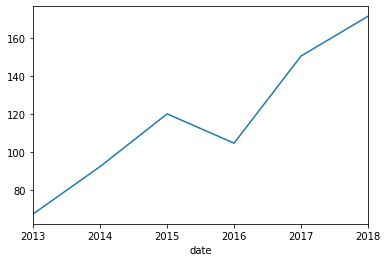

In [76]:
df2['close'].resample('Y').mean().plot()

### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) has any correlation

In [77]:
df2.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624


In [78]:
aapl=pd.read_csv('AAPL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [79]:
goog=pd.read_csv('GOOGL_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
1,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
3,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
4,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [80]:
amzn=pd.read_csv('AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [81]:
msft=pd.read_csv('MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [82]:
#blank dataframe
Tech_stocks_close = pd.DataFrame()

In [83]:
Tech_stocks_close['aapl']=aapl['close']
Tech_stocks_close['goog']=goog['close']
Tech_stocks_close['amzn']=amzn['close']
Tech_stocks_close['msft']=msft['close']

In [84]:
Tech_stocks_close.head()

,aapl,goog,amzn,msft
0,67.8542,393.0777,261.95,27.55
1,68.5614,391.6012,257.21,27.86
2,66.8428,390.7403,258.70,27.88
3,66.7156,391.8214,269.47,28.03
4,66.6556,394.3039,269.24,28.04


### Multi-variate Analysis

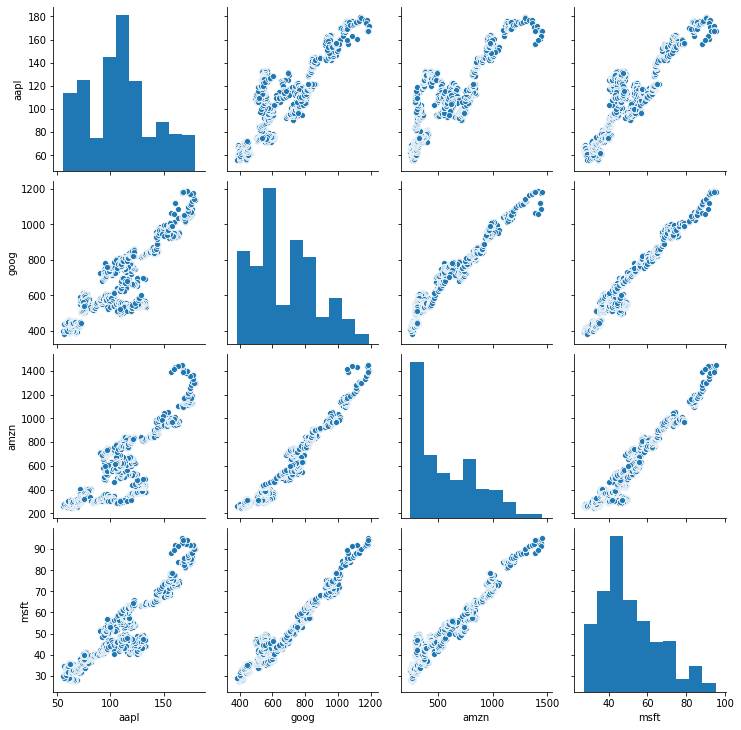

In [85]:
sns.pairplot(data=Tech_stocks_close)

### Correlation plot for stock prices 

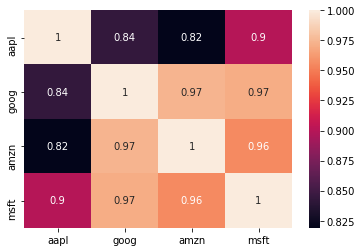

In [86]:
sns.heatmap(Tech_stocks_close.corr(),annot=True)

##### Closing price of Google and Microsoft are well correlated

### Analysis of daily return of each stock & how they are co-related

In [87]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [88]:
daily_return=pd.DataFrame()

In [89]:
daily_return['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
daily_return['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
daily_return['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
daily_return['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [90]:
daily_return.head()

,appl_change,goog_change,amzn_change,msft_change
0,0.206325,0.667196,0.209964,0.725953
1,0.714688,0.513788,-2.328836,0.753769
2,-2.481344,-0.134514,-0.189409,0.000000
3,-0.042869,0.348705,2.946525,0.356761
4,0.443624,1.026873,0.694548,0.427960


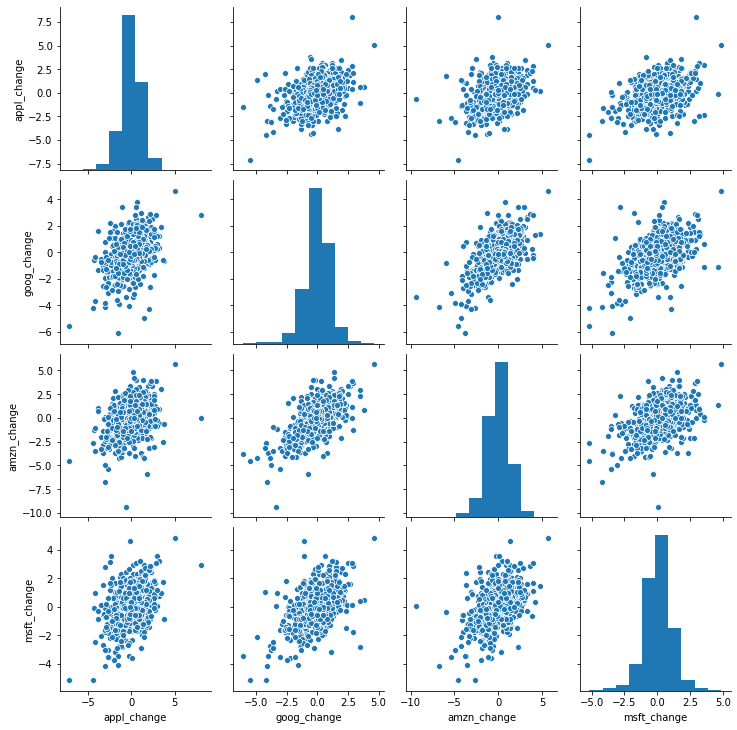

In [91]:
sns.pairplot(data=daily_return)

### Correlation plot for daily returns

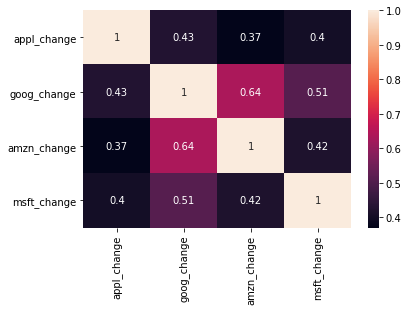

In [92]:
sns.heatmap(daily_return.corr(),annot=True)

#### We can see that Amazon and Google have good correlation on daily returns

### Value At Risk analysis for Apple

In [93]:
import seaborn as sns

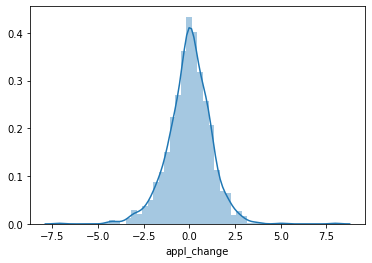

In [94]:
sns.distplot(daily_return['appl_change'])

In [95]:
daily_return['appl_change'].std()

1.1871377131421237

In [96]:
daily_return['appl_change'].quantile(0.1)

-1.4246644227944307

##### -1.4246644227944307 means that 90% of the times the daily Loss will not exceed 1.42

In [97]:
daily_return.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,1259.0,-0.028349,1.052191,-6.107290,-0.575799,-0.004508,0.624730,4.652214
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491


In [98]:
daily_return.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,1259.0,-0.028349,1.052191,-6.107290,-0.575799,-0.004508,0.624730,4.652214
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
